In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/MSIB Batch 7/Project Based Learning/cleaned_dataset_v4.csv'
df = pd.read_csv(file_path)
data = pd.read_csv(file_path)

Mounted at /content/drive


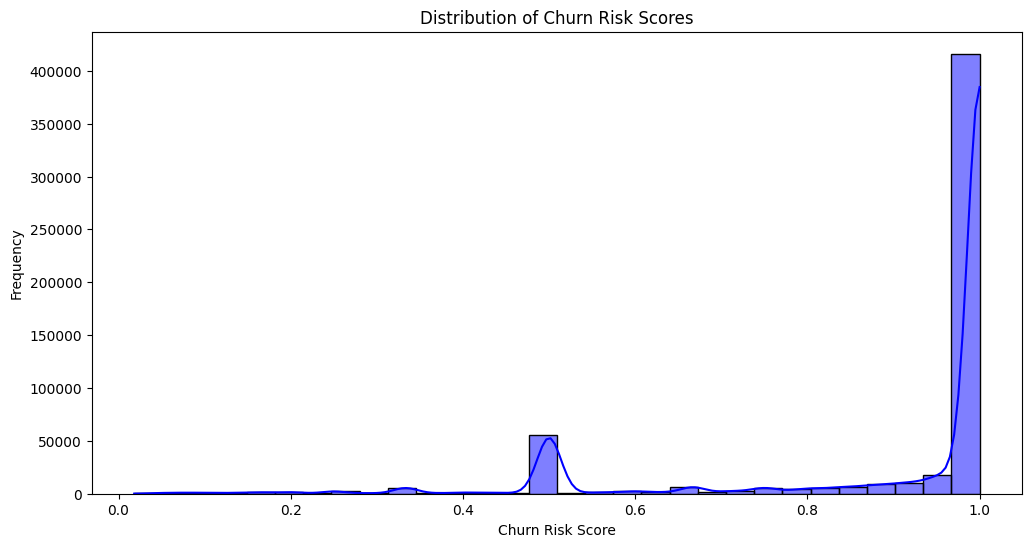

In [4]:
# Churn Risk Score = 1 - (Success Billing / Attempt Charging)
data['churn_risk_score'] = 1 - (data['success_billing'] / (data['attempt_charging'] + 1))  # Avoid division by zero


# Distribution of Churn Risk Scores
plt.figure(figsize=(12, 6))
sns.histplot(data['churn_risk_score'], kde=True, bins=30, color='blue')
plt.title('Distribution of Churn Risk Scores')
plt.xlabel('Churn Risk Score')
plt.ylabel('Frequency')
plt.show()


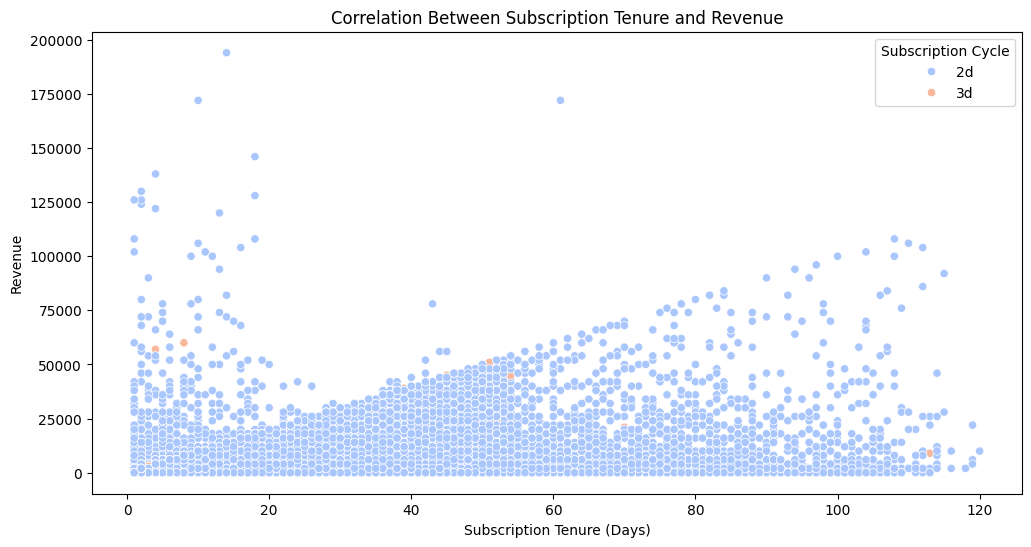

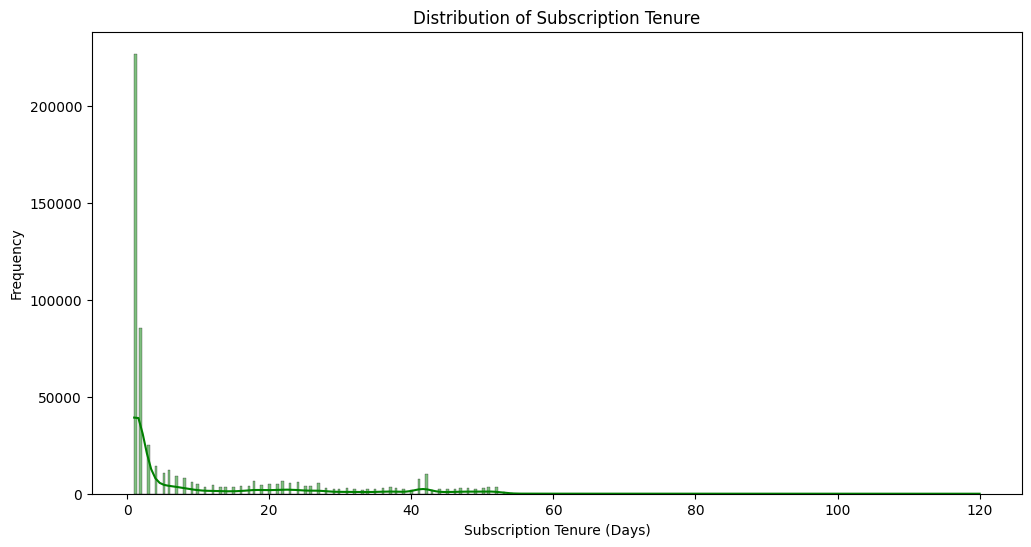

In [7]:
# Ensure datetime format
data['subs_date'] = pd.to_datetime(data['subs_date'])
data['renewal_date'] = pd.to_datetime(data['renewal_date'], errors='coerce')

# Calculate Tenure in Days
data['subscription_tenure_days'] = (data['renewal_date'] - data['subs_date']).dt.days

# Correlation Analysis: Subscription Tenure vs Revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='subscription_tenure_days', y='revenue', data=data, hue='cycle', palette='coolwarm')
plt.title('Correlation Between Subscription Tenure and Revenue')
plt.xlabel('Subscription Tenure (Days)')
plt.ylabel('Revenue')
plt.legend(title='Subscription Cycle')
plt.show()

# Distribution of Subscription Tenure
plt.figure(figsize=(12, 6))
sns.histplot(data['subscription_tenure_days'], kde=True, color='green')
plt.title('Distribution of Subscription Tenure')
plt.xlabel('Subscription Tenure (Days)')
plt.ylabel('Frequency')
plt.show()


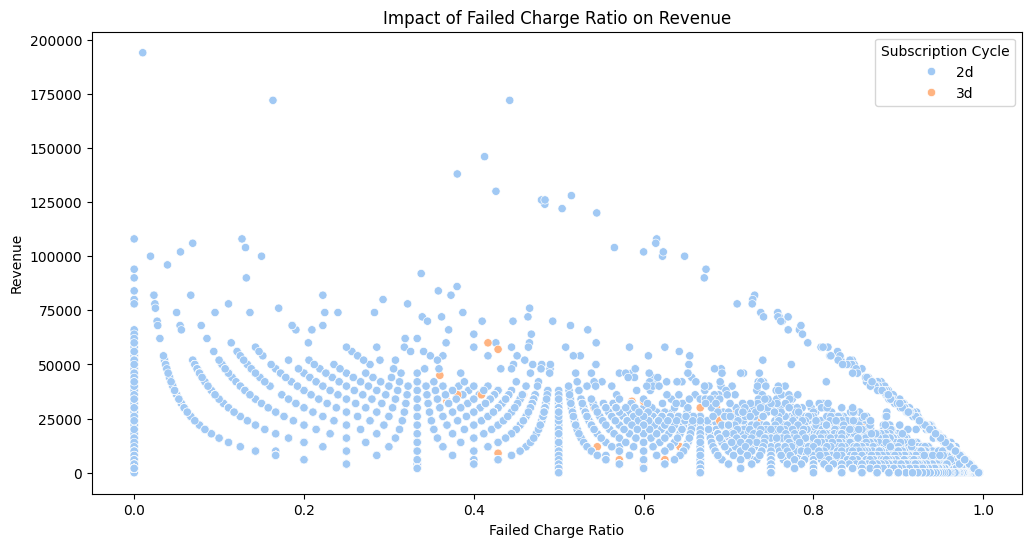

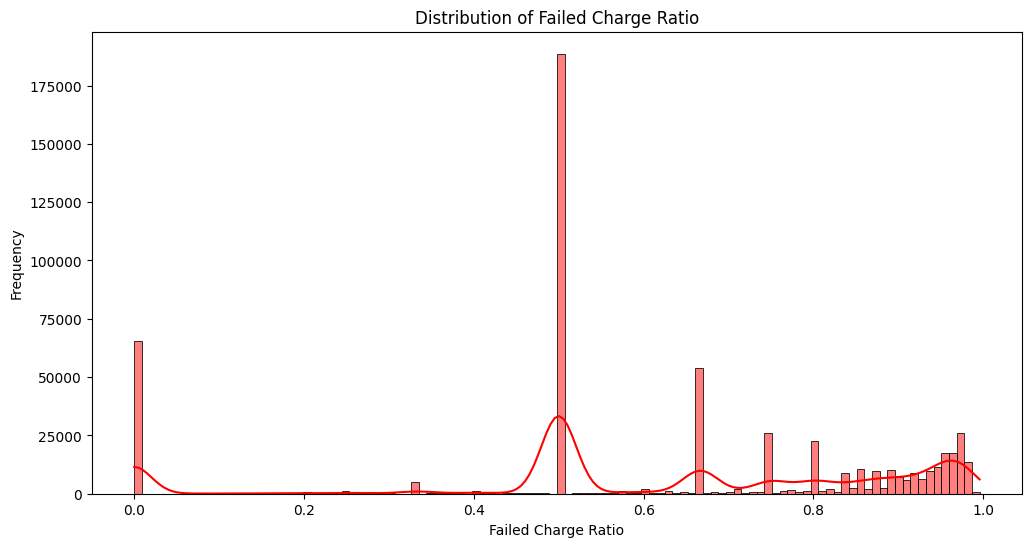

In [9]:
# Failed Charge Ratio = (Attempt Charging - Success Billing) / Attempt Charging
data['failed_charge_ratio'] = (data['attempt_charging'] - data['success_billing']) / (data['attempt_charging'] + 1)  # Avoid division by zero

# Failed Charge Ratio Analysis by Revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='failed_charge_ratio', y='revenue', data=data, hue='cycle', palette='pastel')
plt.title('Impact of Failed Charge Ratio on Revenue')
plt.xlabel('Failed Charge Ratio')
plt.ylabel('Revenue')
plt.legend(title='Subscription Cycle')
plt.show()

# Distribution of Failed Charge Ratio
plt.figure(figsize=(12, 6))
sns.histplot(data['failed_charge_ratio'], kde=True, color='red')
plt.title('Distribution of Failed Charge Ratio')
plt.xlabel('Failed Charge Ratio')
plt.ylabel('Frequency')
plt.show()
